In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from utils import train_test_val_split, normalize_datasets

In [216]:
inlets = pd.read_csv("../datasets/all_inlets.csv", index_col="Time")
inlets = inlets.add_prefix("inlet_")

outlets = pd.read_csv("../datasets/all_outlets.csv", index_col="Time")
outlets = outlets.add_prefix("outlet_")

In [217]:
inlet_temp_cols = list(inlets.columns)
outlet_temp_cols = list(outlets.columns)
del inlet_temp_cols[:2] # delete 'inlet_Case_id' and 'inlet_fan_speed'
del outlet_temp_cols[:2] # delete 'outlet_Case_id' and 'outlet_fan_speed'

In [218]:
df = pd.concat([inlets, outlets], axis=1)

In [219]:
print(df[outlet_temp_cols].min().min())
print(df[inlet_temp_cols].min().min())
print(df[outlet_temp_cols].max().max())
print(df[inlet_temp_cols].max().max())

9.08
9.08
33.12
33.12


In [220]:
df.to_csv("../datasets/df.csv", index=False)

In [221]:
len(df)

1752

In [222]:
df['inlet_Case_id'].value_counts()

5    783
4    371
3    211
2    204
1    183
Name: inlet_Case_id, dtype: int64

In [223]:
df['inlet_Case_id'].value_counts() / len(df)

5    0.446918
4    0.211758
3    0.120434
2    0.116438
1    0.104452
Name: inlet_Case_id, dtype: float64

In [224]:
case_1 = df[df['inlet_Case_id'] == 1]
case_2 = df[df['inlet_Case_id'] == 2]
case_3 = df[df['inlet_Case_id'] == 3]
case_4 = df[df['inlet_Case_id'] == 4]
case_5 = df[df['inlet_Case_id'] == 5]

In [225]:
# Drop Case id columns
case_1 = case_1.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_2 = case_2.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_3 = case_3.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_4 = case_4.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_5 = case_5.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)

# Visualization

In [226]:
def plot_temp(case_df, id, is_inlet=True, test_size=0):
    train_df, test_df, val_df = train_test_val_split(case_df, test_size=test_size)

    fig, ax = plt.subplots(figsize=(12,8))

    cols = inlet_temp_cols if is_inlet else outlet_temp_cols
    train_df[cols].mean(axis=1).plot(label="Train")
    val_df[cols].mean(axis=1).plot(label="Validation")
    test_df[cols].mean(axis=1).plot(label="Test")

    mean = case_df[cols].mean().mean()
    plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
    plt.text(0, mean+0.005, "{:.2f}".format(mean), color='r')

    plt.title(f"Case {id} - Average {'Inlet' if is_inlet else 'Outlet'} Temperature (1-135)")
    plt.xlabel("Time (s)")
    plt.ylabel("Average Temperature (C°)")

    plt.legend()

    plt.savefig(f"../plots/preprocessing/case{id}_{'inlet' if is_inlet else 'outlet'}_temp.jpg", dpi=300)

In [227]:
def plot_fan_speed(case_df, id, is_inlet=True, test_size=0):
    train_df, test_df, val_df = train_test_val_split(case_df, test_size=test_size) 

    fig, ax = plt.subplots(figsize=(12,8))

    col = 'inlet_fan_speed' if is_inlet else 'outlet_fan_speed'

    train_df[col].plot(label="Train")
    val_df[col].plot(label="Validation")
    test_df[col].plot(label="Test")

    plt.title(f"Case {id} - {'Inlet' if is_inlet else 'Outlet'} Fan Speed")
    plt.xlabel("Time (s)")
    plt.ylabel("Fan Speed (PWM)")
    plt.legend()
    # plt.tight_layout()

    plt.savefig(f"../plots/preprocessing/case{id}_{'inlet' if is_inlet else 'outlet'}_fan_speed.jpg", dpi=300)

## Case 1

In [228]:
train_c1, test_c1, val_c1 = train_test_val_split(case_1, test_size=1)

### Fan Speed

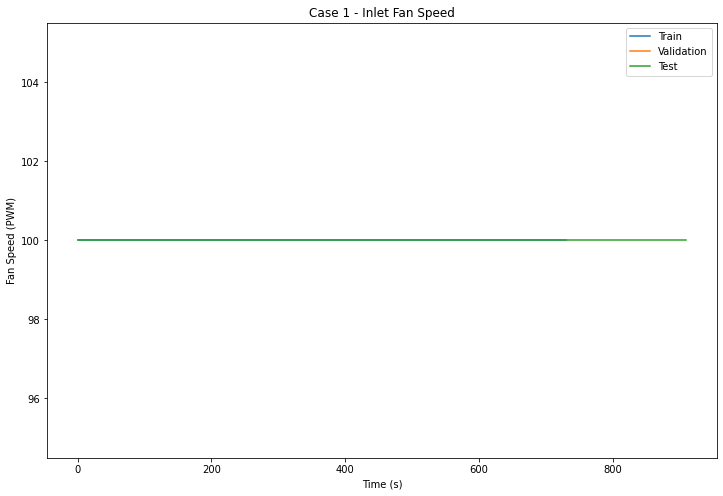

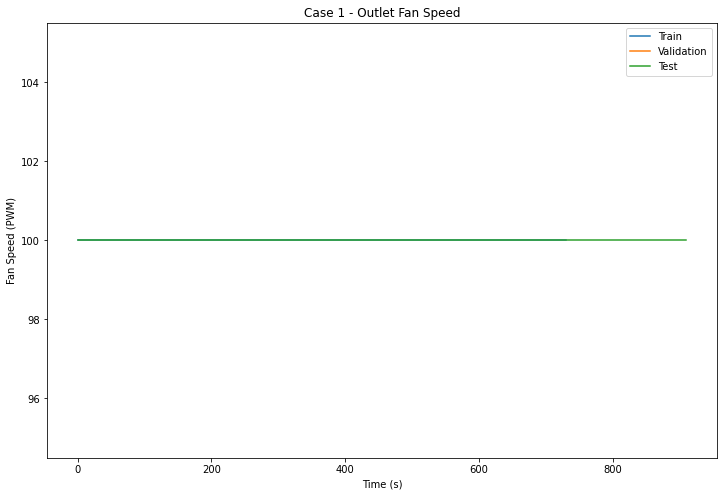

In [229]:
plot_fan_speed(case_df=case_1, id=1, is_inlet=True, test_size=1)
plot_fan_speed(case_df=case_1, id=1, is_inlet=False, test_size=1)

### Temperature

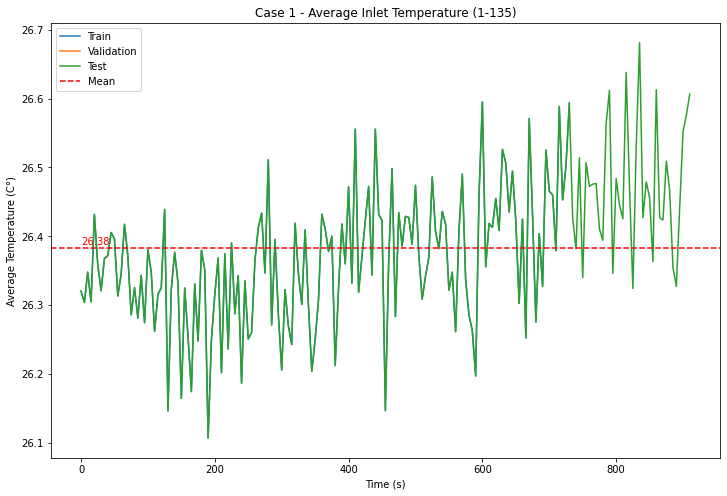

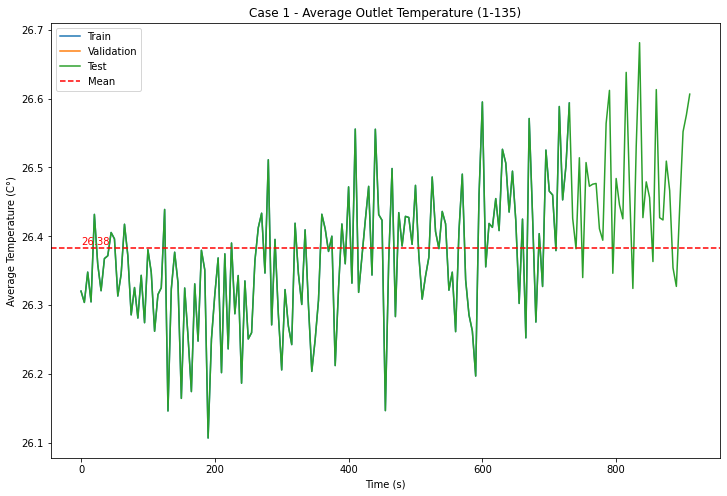

In [230]:
plot_temp(case_df=case_1, id=1, is_inlet=True, test_size=1)
plot_temp(case_df=case_1, id=1, is_inlet=False, test_size=1)

In [231]:
case_1 = normalize_datasets(case_1, outlet_temp_cols, inlet_temp_cols)

In [232]:
case_1.to_csv('../datasets/case_1.csv')

## Case 2

In [233]:
train_c2, test_c2, val_c2 = train_test_val_split(case_2, test_size=0)

### Fan Speed

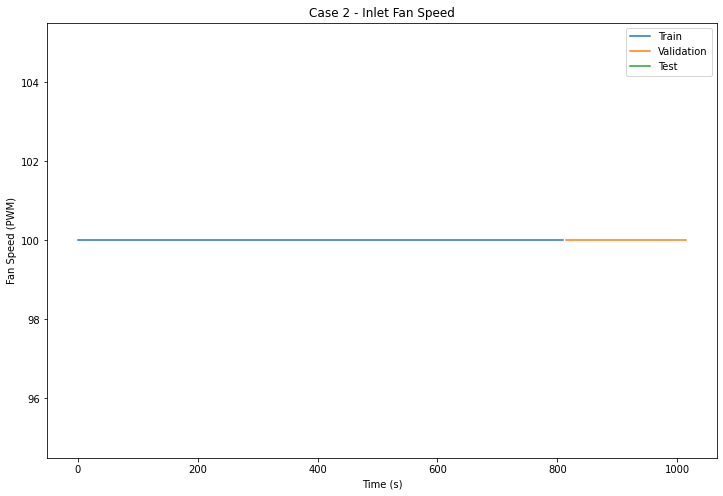

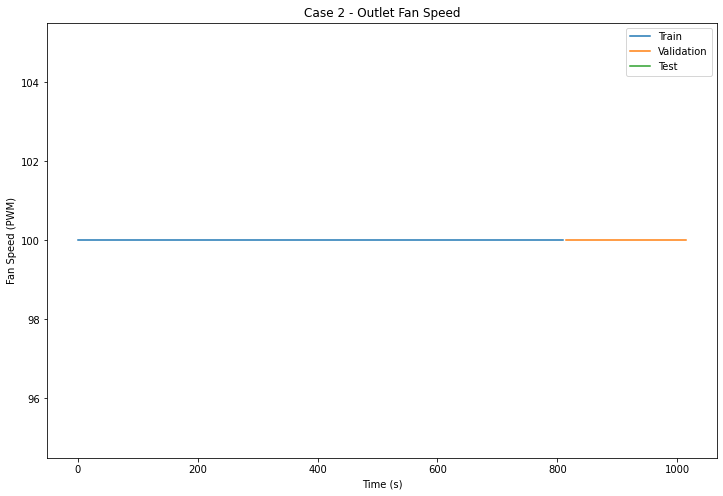

In [234]:
plot_fan_speed(case_df=case_2, id=2, is_inlet=True, test_size=0)
plot_fan_speed(case_df=case_2, id=2, is_inlet=False, test_size=0)

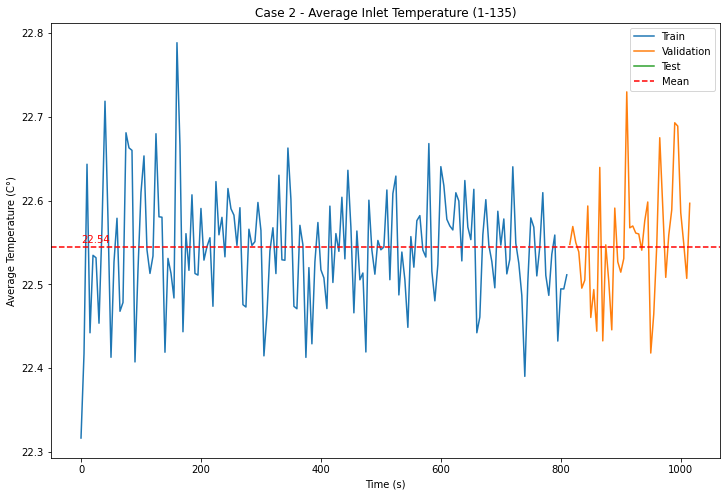

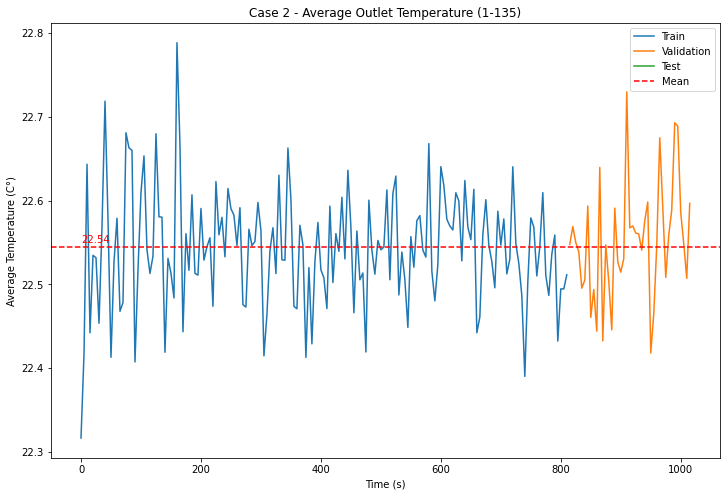

In [235]:
plot_temp(case_df=case_2, id=2, is_inlet=True, test_size=0)
plot_temp(case_df=case_2, id=2, is_inlet=False, test_size=0)

In [236]:
case_2 = normalize_datasets(case_2, outlet_temp_cols, inlet_temp_cols)

In [237]:
case_2.to_csv('../datasets/case_2.csv')

## Case 3

In [238]:
train_c3, test_c3, val_c3 = train_test_val_split(case_3, test_size=0)

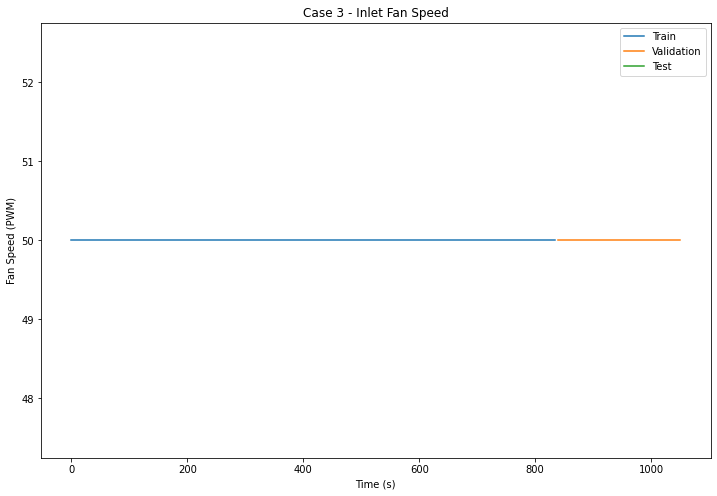

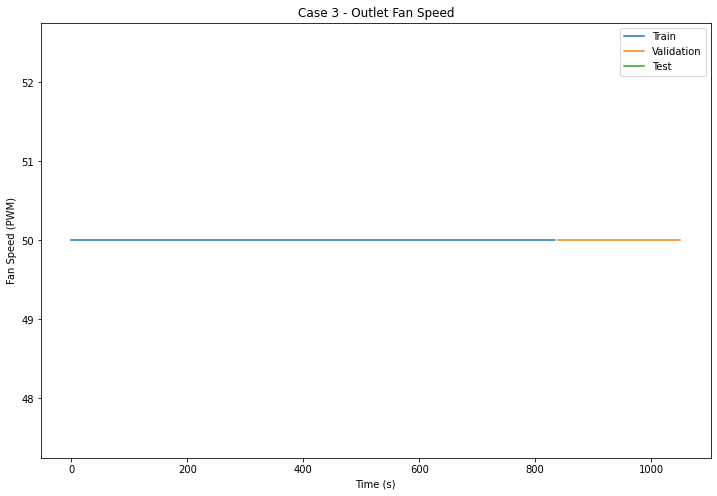

In [239]:
plot_fan_speed(case_df=case_3, id=3, is_inlet=True, test_size=0)
plot_fan_speed(case_df=case_3, id=3, is_inlet=False, test_size=0)

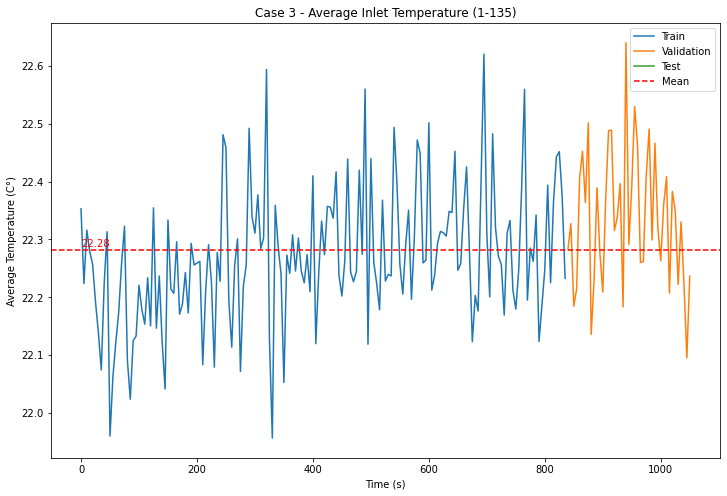

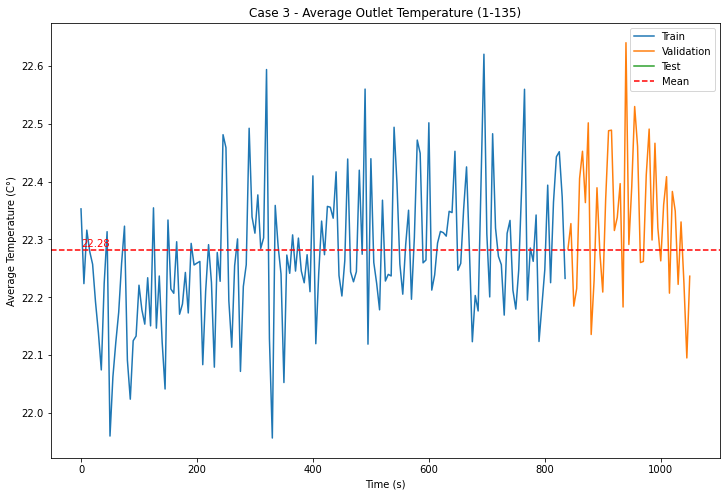

In [240]:
plot_temp(case_df=case_3, id=3, is_inlet=True, test_size=0)
plot_temp(case_df=case_3, id=3, is_inlet=False, test_size=0)

In [241]:
case_3 = normalize_datasets(case_3, outlet_temp_cols, inlet_temp_cols)

In [242]:
case_3.to_csv('../datasets/case_3.csv')

## Case 4

In [243]:
train_c4, test_c4, val_c4 = train_test_val_split(case_4, test_size=0)

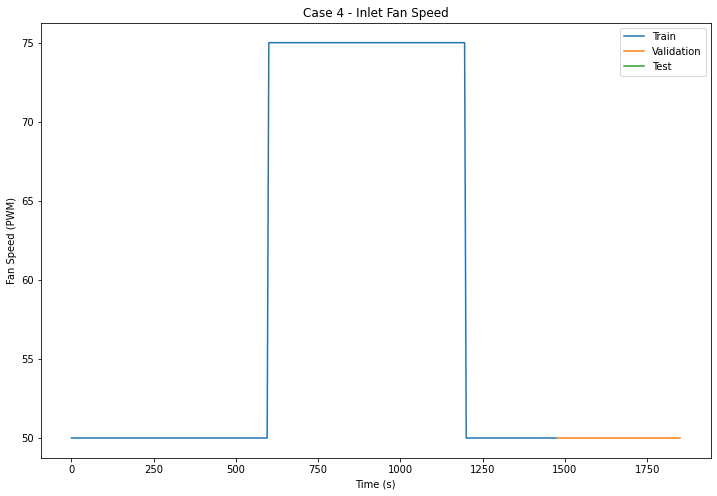

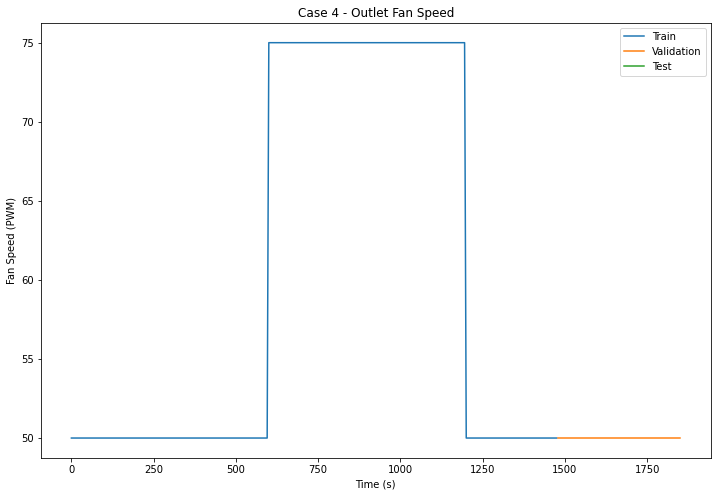

In [244]:
plot_fan_speed(case_df=case_4, id=4, is_inlet=True, test_size=0)
plot_fan_speed(case_df=case_4, id=4, is_inlet=False, test_size=0)

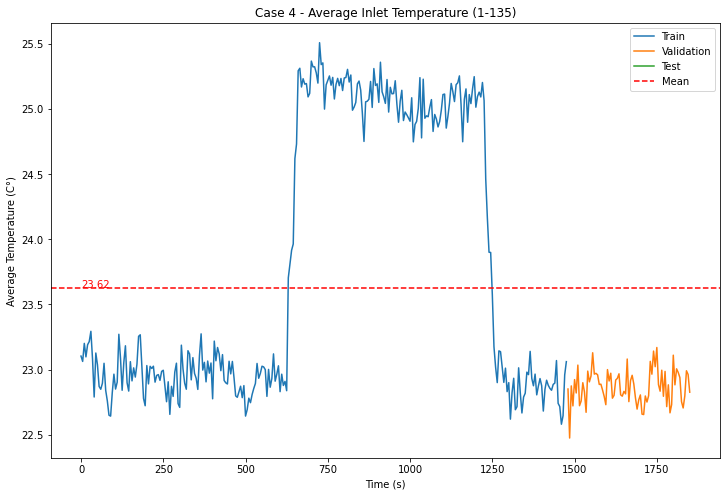

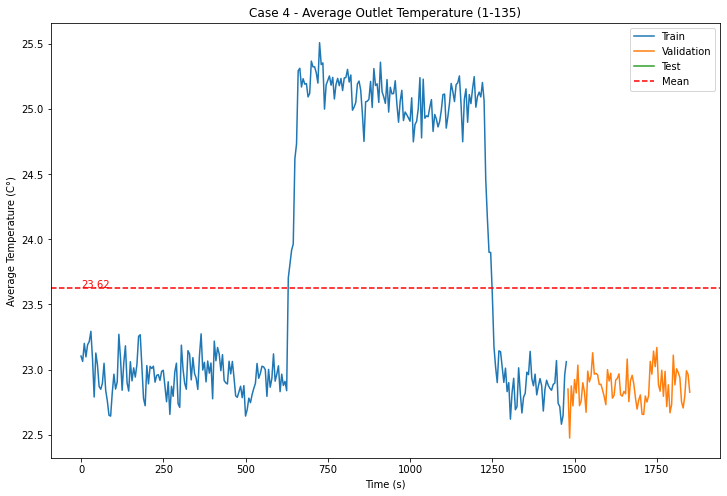

In [245]:
plot_temp(case_df=case_4, id=4, is_inlet=True, test_size=0)
plot_temp(case_df=case_4, id=4, is_inlet=False, test_size=0)

In [246]:
case_4 = normalize_datasets(case_4, outlet_temp_cols, inlet_temp_cols)

In [247]:
case_4.to_csv('../datasets/case_4.csv')

## Case 5

In [248]:
train_c5, test_c5, val_c5 = train_test_val_split(case_5, test_size=0)

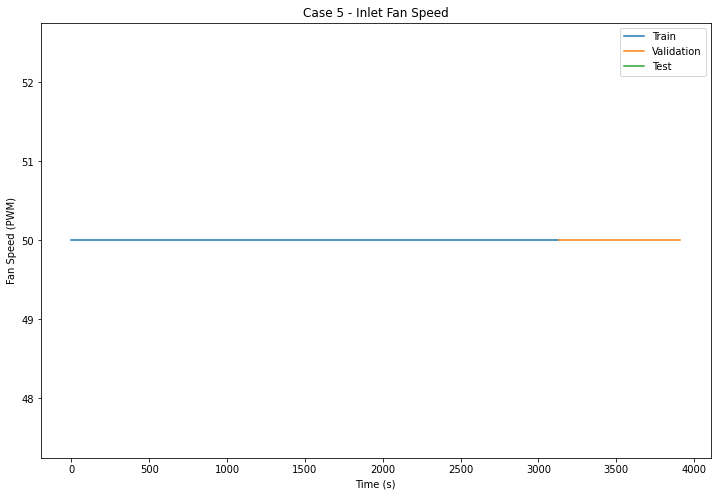

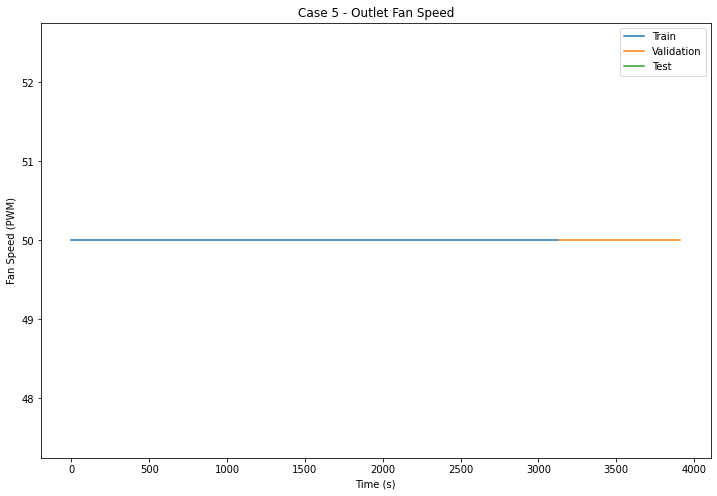

In [249]:
plot_fan_speed(case_df=case_5, id=5, is_inlet=True, test_size=0)
plot_fan_speed(case_df=case_5, id=5, is_inlet=False, test_size=0)

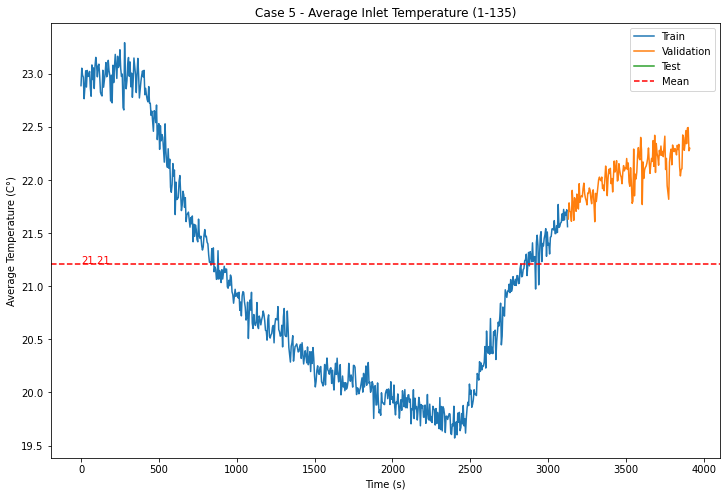

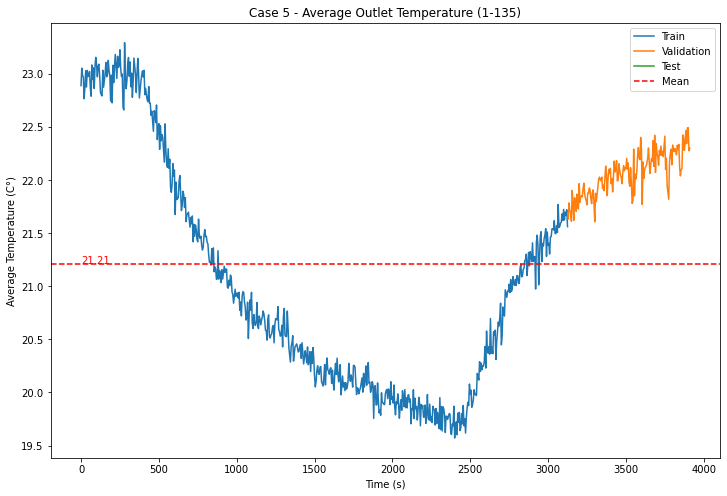

In [250]:
plot_temp(case_df=case_5, id=5, is_inlet=True, test_size=0)
plot_temp(case_df=case_5, id=5, is_inlet=False, test_size=0)

In [251]:
case_5 = normalize_datasets(case_5, outlet_temp_cols, inlet_temp_cols)

In [252]:
case_5.to_csv('../datasets/case_5.csv')